# Final Results and Training Histories

In [1]:
import os
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
import json
from cycler import cycler
#import seaborn as sns

rcparams = {                      
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "lmodern",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],          
    "font.size": 12,
    "legend.fontsize": 12,         
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
}
mpl.rcParams.update(rcparams)

In [2]:
cwd = os.getcwd()
ordered_keys = ["0.001","0.002","0.003","0.004","0.005","0.006","0.007","0.008",
                "0.009","0.01","0.011","0.012","0.013", "0.014","0.015"]
variable_keys = ["exploration_fraction", "max_eps", "final_eps", "learning_rate", "target_network_update_freq"]

def dict_to_list(the_dict, ordered_keys):
    output_list = []
    for key in ordered_keys:
        if key in the_dict.keys():
            output_list.append(the_dict[key])
    return output_list

def config_dict_to_string(config_dict, variable_keys):
    base_string = "["
    end = len(variable_keys)
    count = 1
    for key in variable_keys:
        if key in config_dict.keys():
            if count < end:
                if key == "exploration_fraction":
                    if config_dict[key] == 100000:
                        base_string = base_string+"1e5, "
                    else:
                        base_string = base_string+"2e5, "
                else:
                    base_string = base_string+str(config_dict[key])+", "
            else:
                base_string = base_string+str(config_dict[key])+"]"
            count +=1
    return base_string

## Bitflip noise - All agents

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


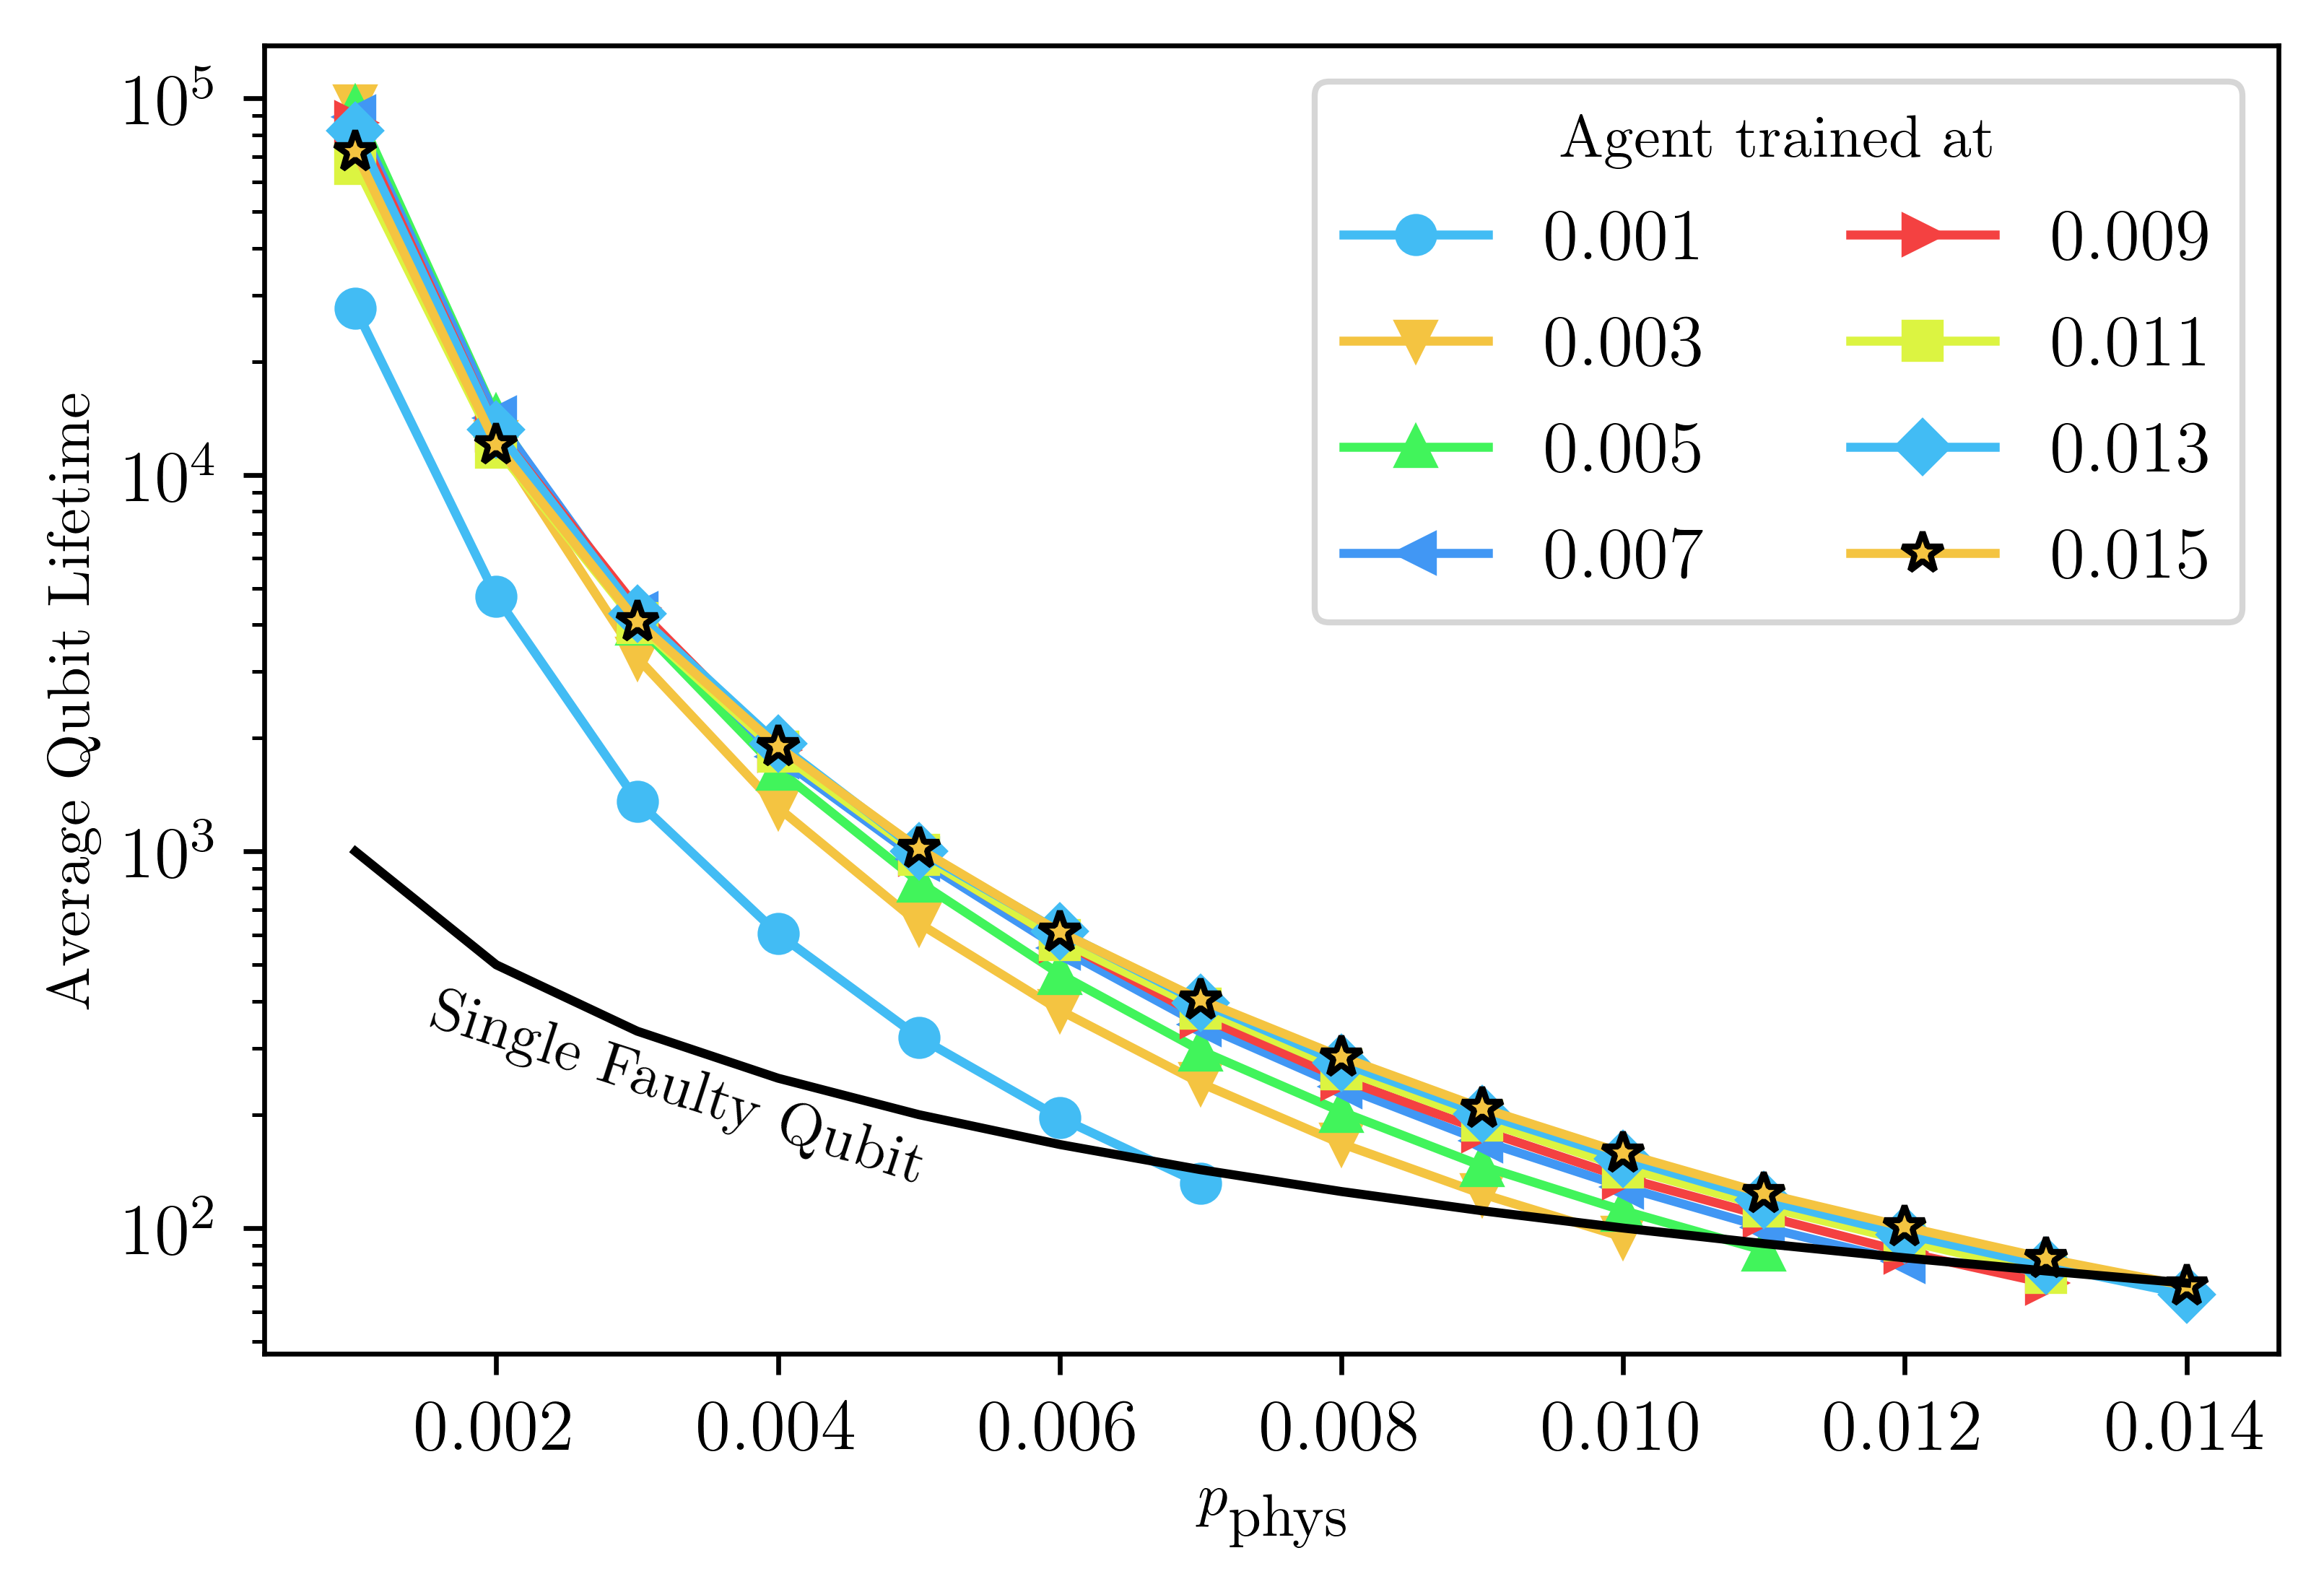

In [3]:
x_folder = os.path.join(cwd,"../trained_models/d5_x/")
x_results_dict = {}
x_training_dict = {}
x_configs_dict = {}

for direct in os.listdir(x_folder):
    if "fixed_config" not in direct:
        path_to_results = os.path.join(x_folder,direct+"/all_results.p")
        path_to_training_history = os.path.join(x_folder,direct+"/training_history.json")

        x_results_dict[direct] = pickle.load( open(path_to_results, "rb" ))
        with open(path_to_training_history) as f:
            history = json.load(f)
        x_training_dict[direct] = history["episode_lifetimes_rolling_avg"]
        
        err_direct = os.path.join(x_folder,direct)
        for f in os.listdir(err_direct):
            if "variable_config" in f:
                path_to_config = os.path.join(err_direct,f)
        x_configs_dict[direct] = config_dict_to_string(pickle.load( open(path_to_config, "rb" )),variable_keys)
        
        
        
ordered_x_results = {}

for key in x_results_dict.keys():
    ordered_x_results[key] = dict_to_list(x_results_dict[key], ordered_keys)


custom_colors=["#42bcf4", "#f4c441", "#41f45b", "#4197f4", "#f44141", "#dcf441"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=custom_colors)
    
markers = ["o","v","^","<",">","s","D","*"]
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

fig, ax = plt.subplots(dpi=600)#, figsize=(10,6))
#fig.set_size_inches(3.54,0.6*3.54)
#plt.figure(figsize = (10,6))

count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_x_results.keys():
        if max_l < len(ordered_x_results[key]):
            max_l = len(ordered_x_results[key])
        if( key != "0.015" ):
            #ax.plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, markeredgecolor='k', markeredgewidth=0.5, label="$%s$"%key)
            ax.plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, label="$%s$"%key)
        else:
            ax.plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=7, markeredgecolor='k', label="$%s$"%key)
        count += 1
                        
ax.plot(p_phys[:max_l],bench[:max_l],"k")#,label="Single \n Faulty Qubit")
ax.text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)

ax.set_yscale('log')
    
#ax.set_title("Bitflip Noise - All Agents")
ax.set_ylabel("Average Qubit Lifetime")
ax.set_xlabel("$p_{\\textrm{phys}}$")# = p_{\\textrm{meas}}$")
ax.legend(fancybox=True, ncol=2, title="Agent trained at")
fig.savefig("./Images_Alt/bitflip_noise_all_agents.pdf", bbox_inches='tight')

## Bitflip noise - best result

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


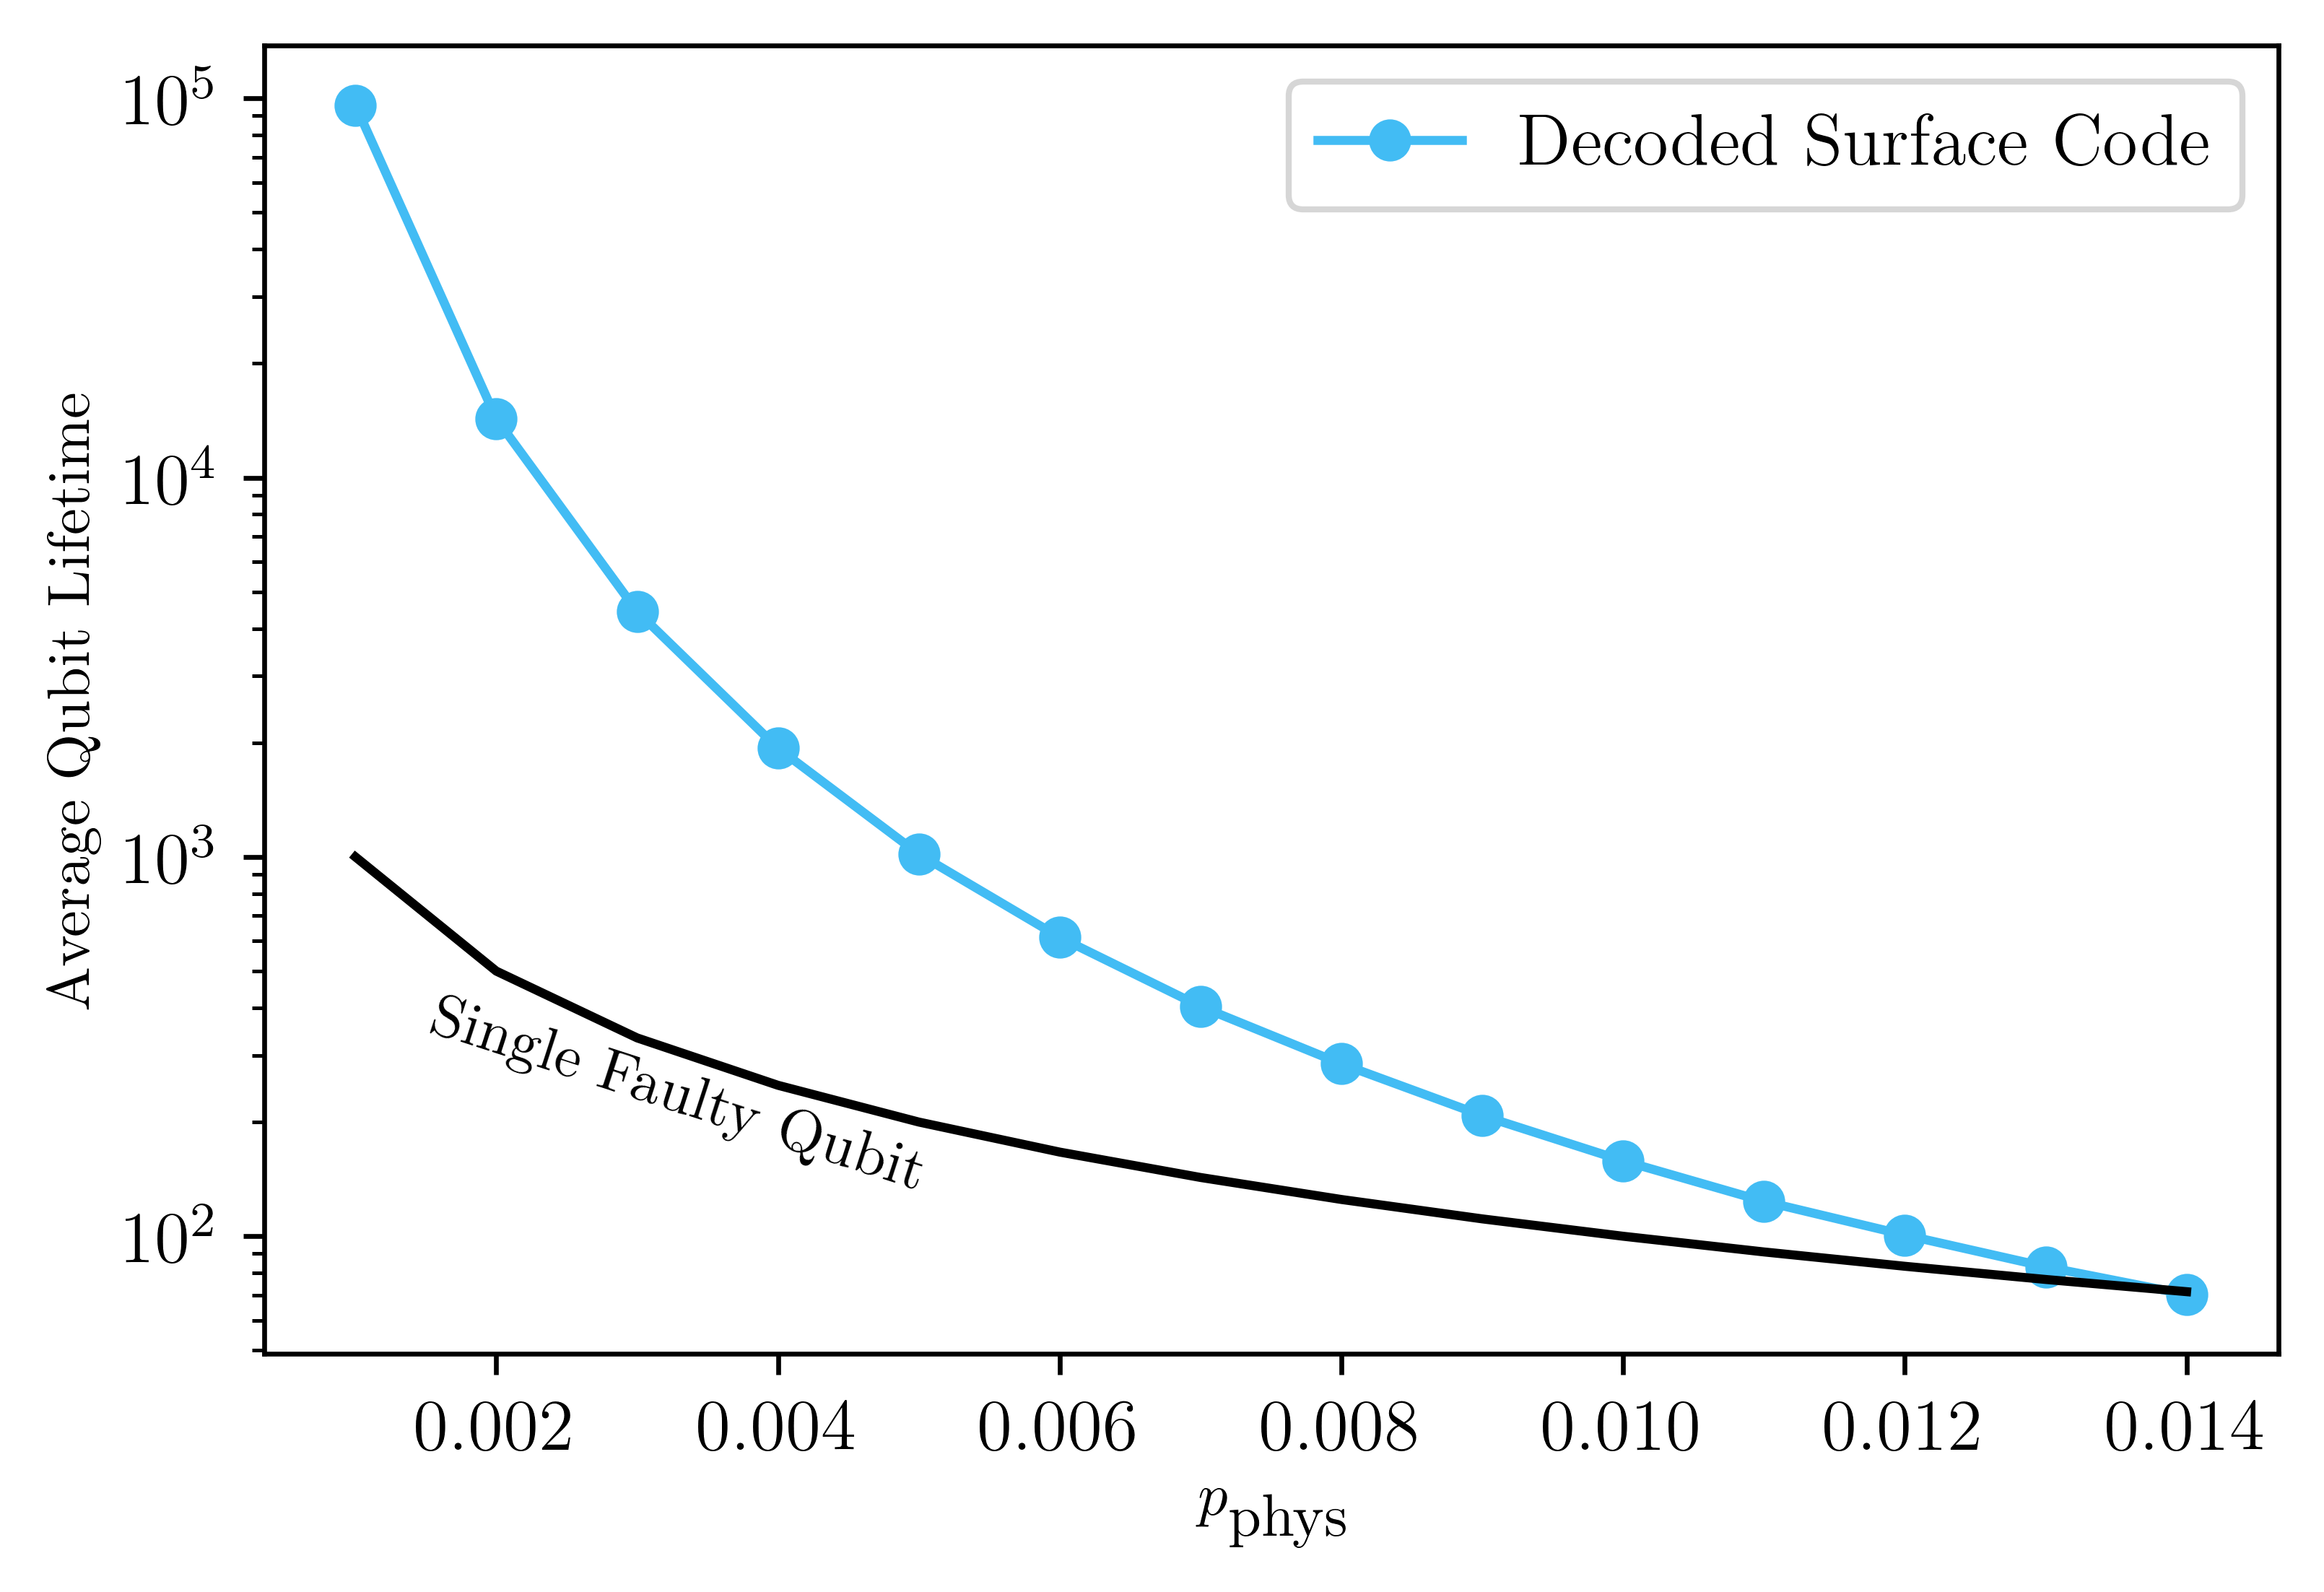

In [4]:
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_x_results.keys():
            if len(ordered_x_results[agent]) >= j+1:
                if ordered_x_results[agent][j] > benchmark:
                    benchmark = ordered_x_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

fig, ax = plt.subplots(dpi=600)
ax.plot(p_phys[:len(best_results)], best_results, '-o', label="Decoded Surface Code")

ax.plot(p_phys[:len(best_results)],bench[:len(best_results)],"k")
ax.text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax.set_yscale('log')
    
#plt.title("Bitflip Noise")
ax.set_ylabel("Average Qubit Lifetime")
ax.set_xlabel("$p_{\\textrm{phys}}$")
ax.legend(fancybox=True)
fig.savefig("./Images_Alt/bitflip_noise.pdf", bbox_inches='tight')

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


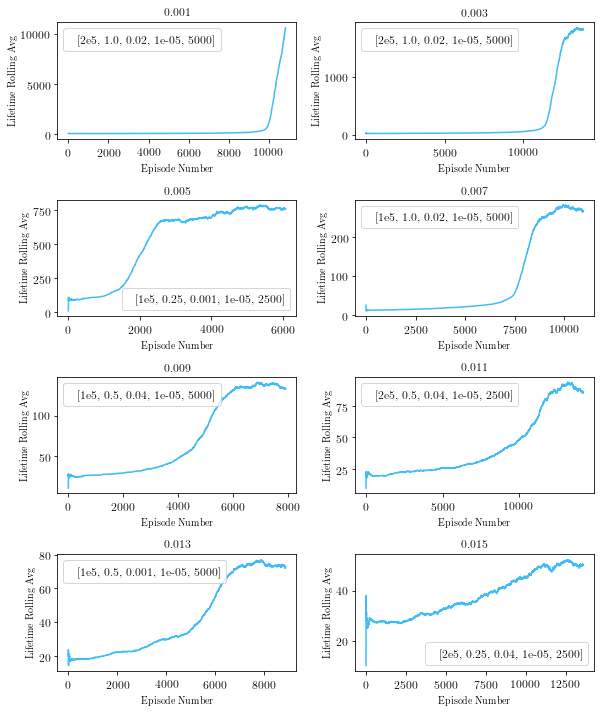

In [5]:
plt.figure(figsize=(8.5,10))
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011","0.013", "0.015"]
count = 1
for key in trained_keys:
    plt.subplot(4, 2,count)
    plt.plot(x_training_dict[key],label = x_configs_dict[key] )
    plt.title(key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    plt.legend(handlelength=0,)
    count +=1
    

plt.tight_layout()
plt.savefig("./Images/bitflip_training")
    

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


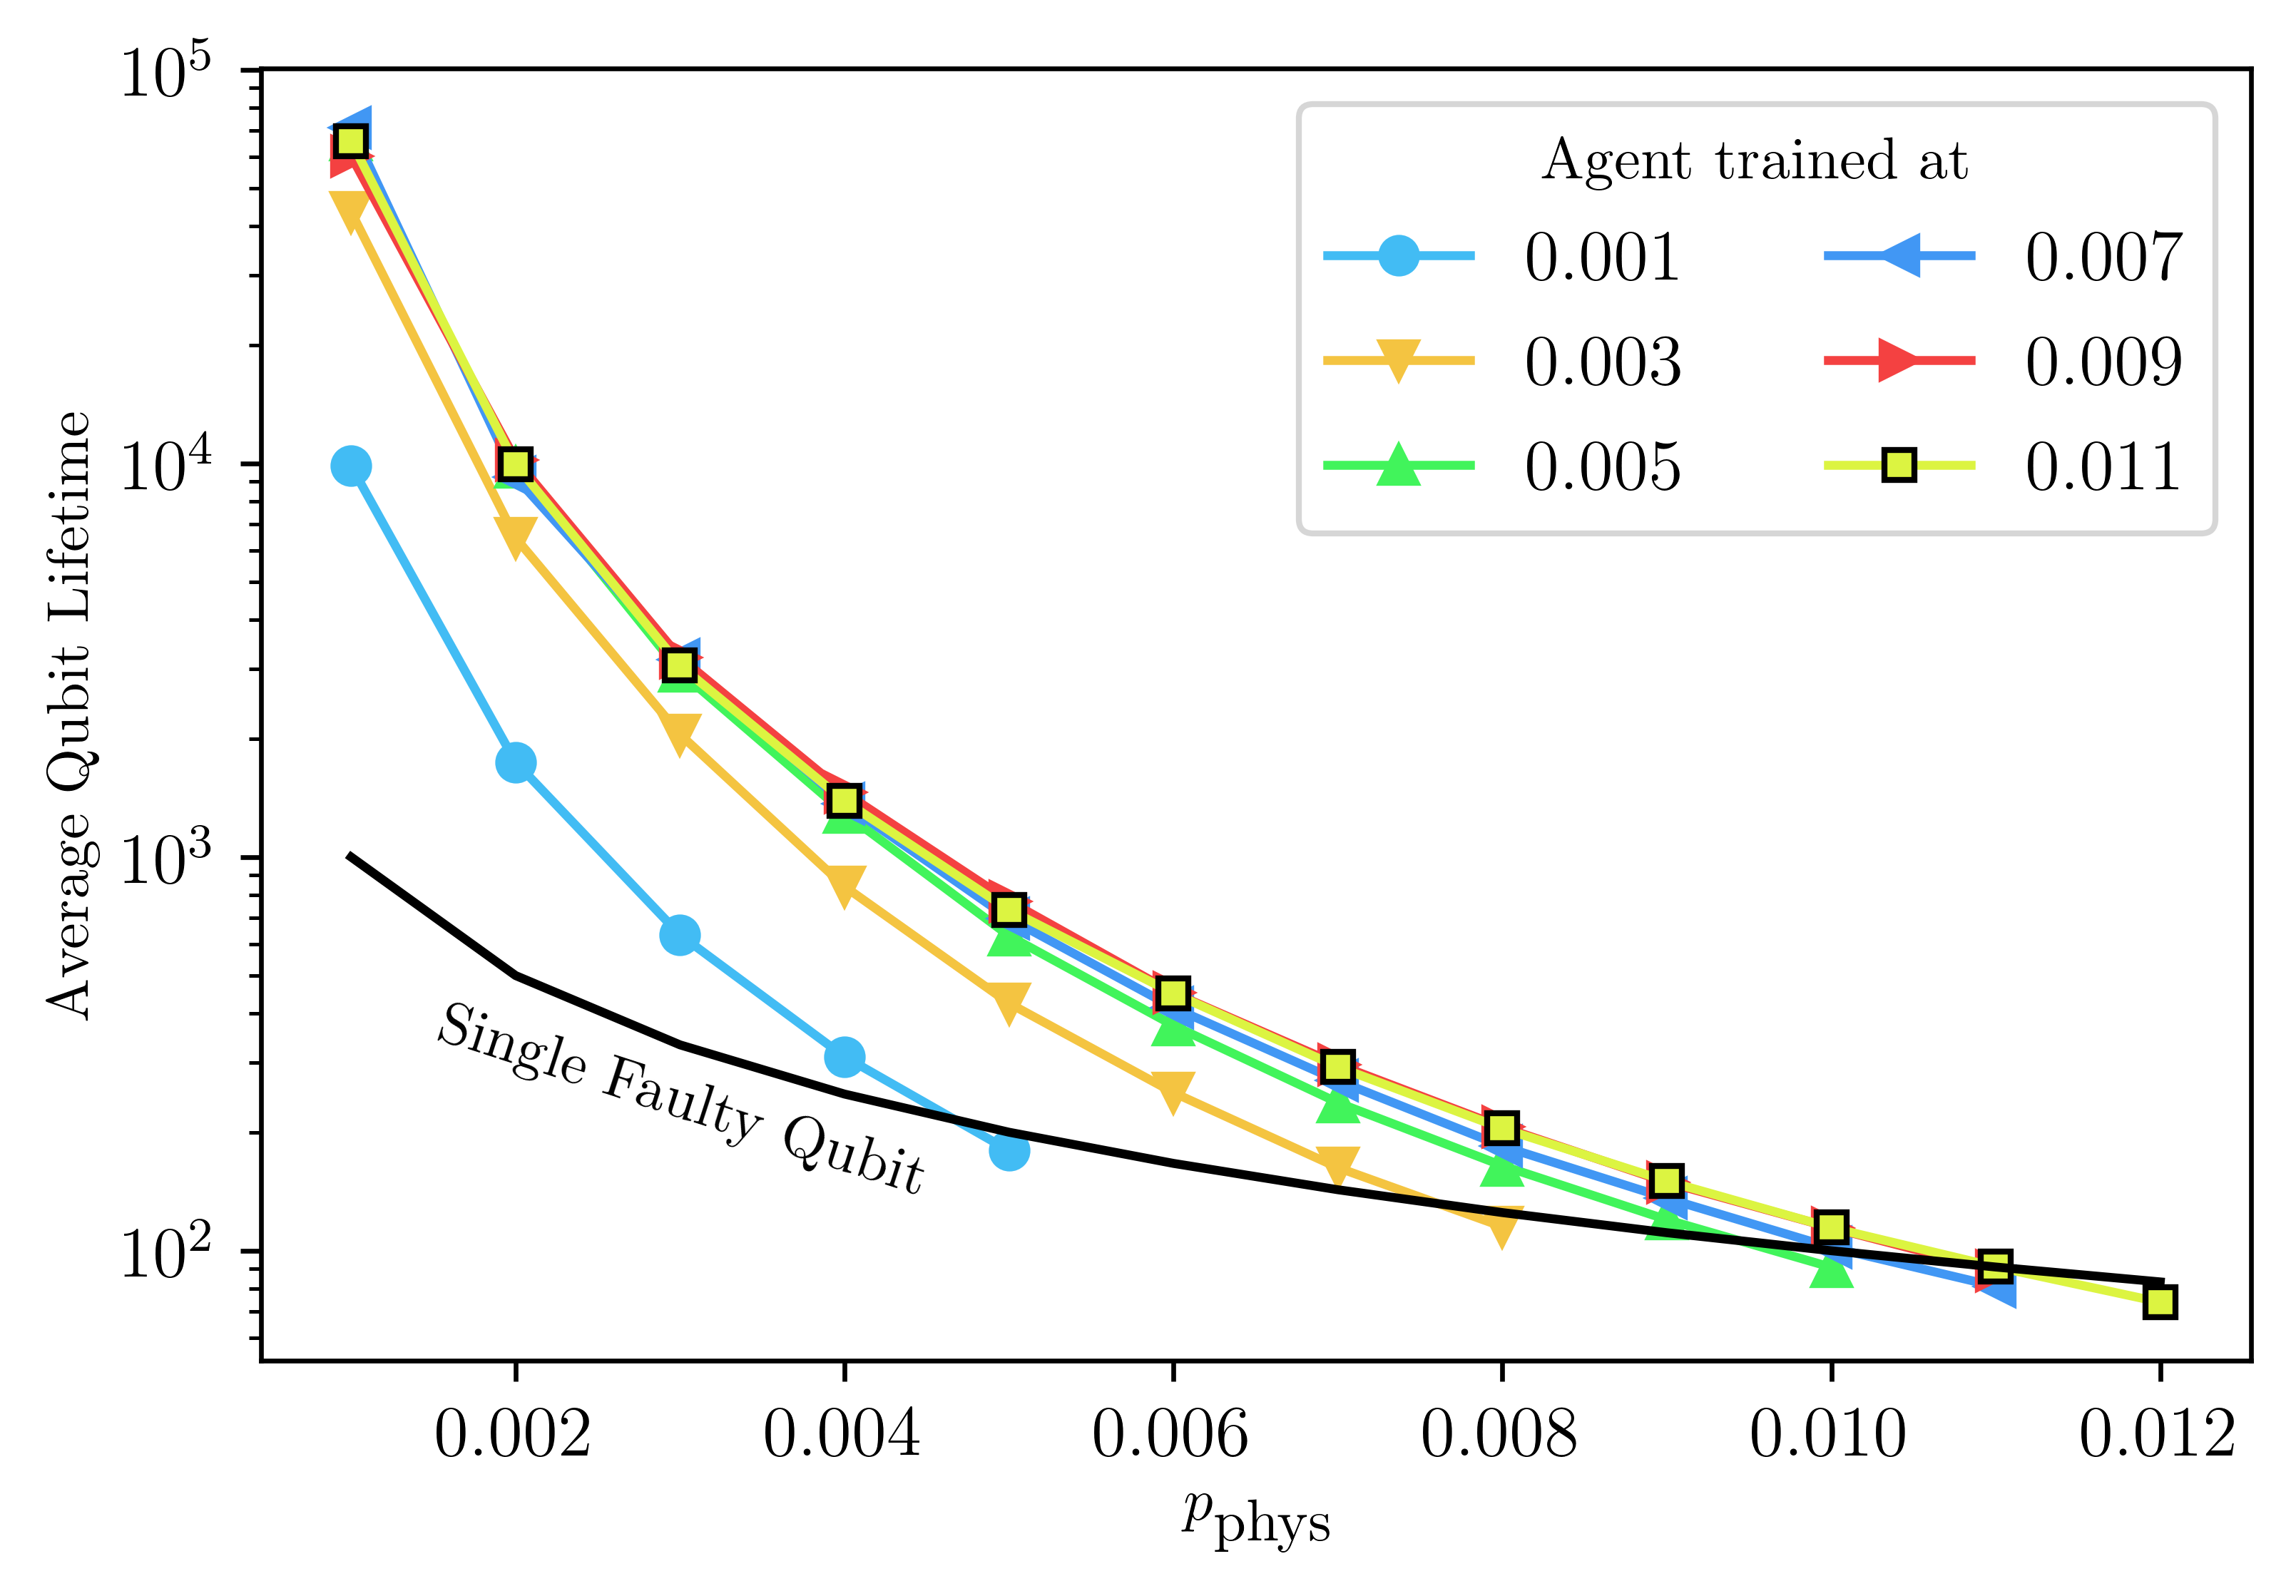

In [6]:
dp_folder = os.path.join(cwd,"../trained_models/d5_dp/")
dp_results_dict = {}
dp_training_dict = {}
dp_configs_dict = {}

for direct in os.listdir(dp_folder):
    if "fixed_config" not in direct:
        path_to_results = os.path.join(dp_folder,direct+"/all_results.p")
        path_to_training_history = os.path.join(dp_folder,direct+"/training_history.json")

        dp_results_dict[direct] = pickle.load( open(path_to_results, "rb" ))
        with open(path_to_training_history) as f:
            history = json.load(f)
        dp_training_dict[direct] = history["episode_lifetimes_rolling_avg"]
        
        err_direct = os.path.join(dp_folder,direct)
        for f in os.listdir(err_direct):
            if "variable_config" in f:
                path_to_config = os.path.join(err_direct,f)
        dp_configs_dict[direct] = config_dict_to_string(pickle.load( open(path_to_config, "rb" )),variable_keys)
        
        
        
ordered_dp_results = {}

for key in dp_results_dict.keys():
    ordered_dp_results[key] = dict_to_list(dp_results_dict[key], ordered_keys)
    

custom_colors=["#42bcf4", "#f4c441", "#41f45b", "#4197f4", "#f44141", "#dcf441"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=custom_colors)
    
markers = ["o","v","^","<",">","s","D","*"]
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

fig, ax = plt.subplots(dpi=600)#, figsize=(10,6))
#fig.set_size_inches(3.54,0.6*3.54)
#plt.figure(figsize = (10,6))

count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_dp_results.keys():
        if max_l < len(ordered_dp_results[key]):
            max_l = len(ordered_dp_results[key])
        if( key != "0.011" ):
            #ax.plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, markeredgecolor='k', markeredgewidth=0.5, label="$%s$"%key)
            ax.plot(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key], marker=markers[count], markersize=6, label="$%s$"%key)
        else:
            ax.plot(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key], marker=markers[count], markersize=5, markeredgecolor='k', label="$%s$"%key)
        count += 1
                        
ax.plot(p_phys[:max_l],bench[:max_l],"k")#,label="Single \n Faulty Qubit")
ax.text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)

ax.set_yscale('log')
    
#ax.set_title("Bitflip Noise - All Agents")
ax.set_ylabel("Average Qubit Lifetime")
ax.set_xlabel("$p_{\\textrm{phys}}$")# = p_{\\textrm{meas}}$")
ax.legend(fancybox=True, ncol=2, title="Agent trained at")
fig.savefig("./Images_Alt/depolarising_noise_all_agents.pdf", bbox_inches='tight')

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


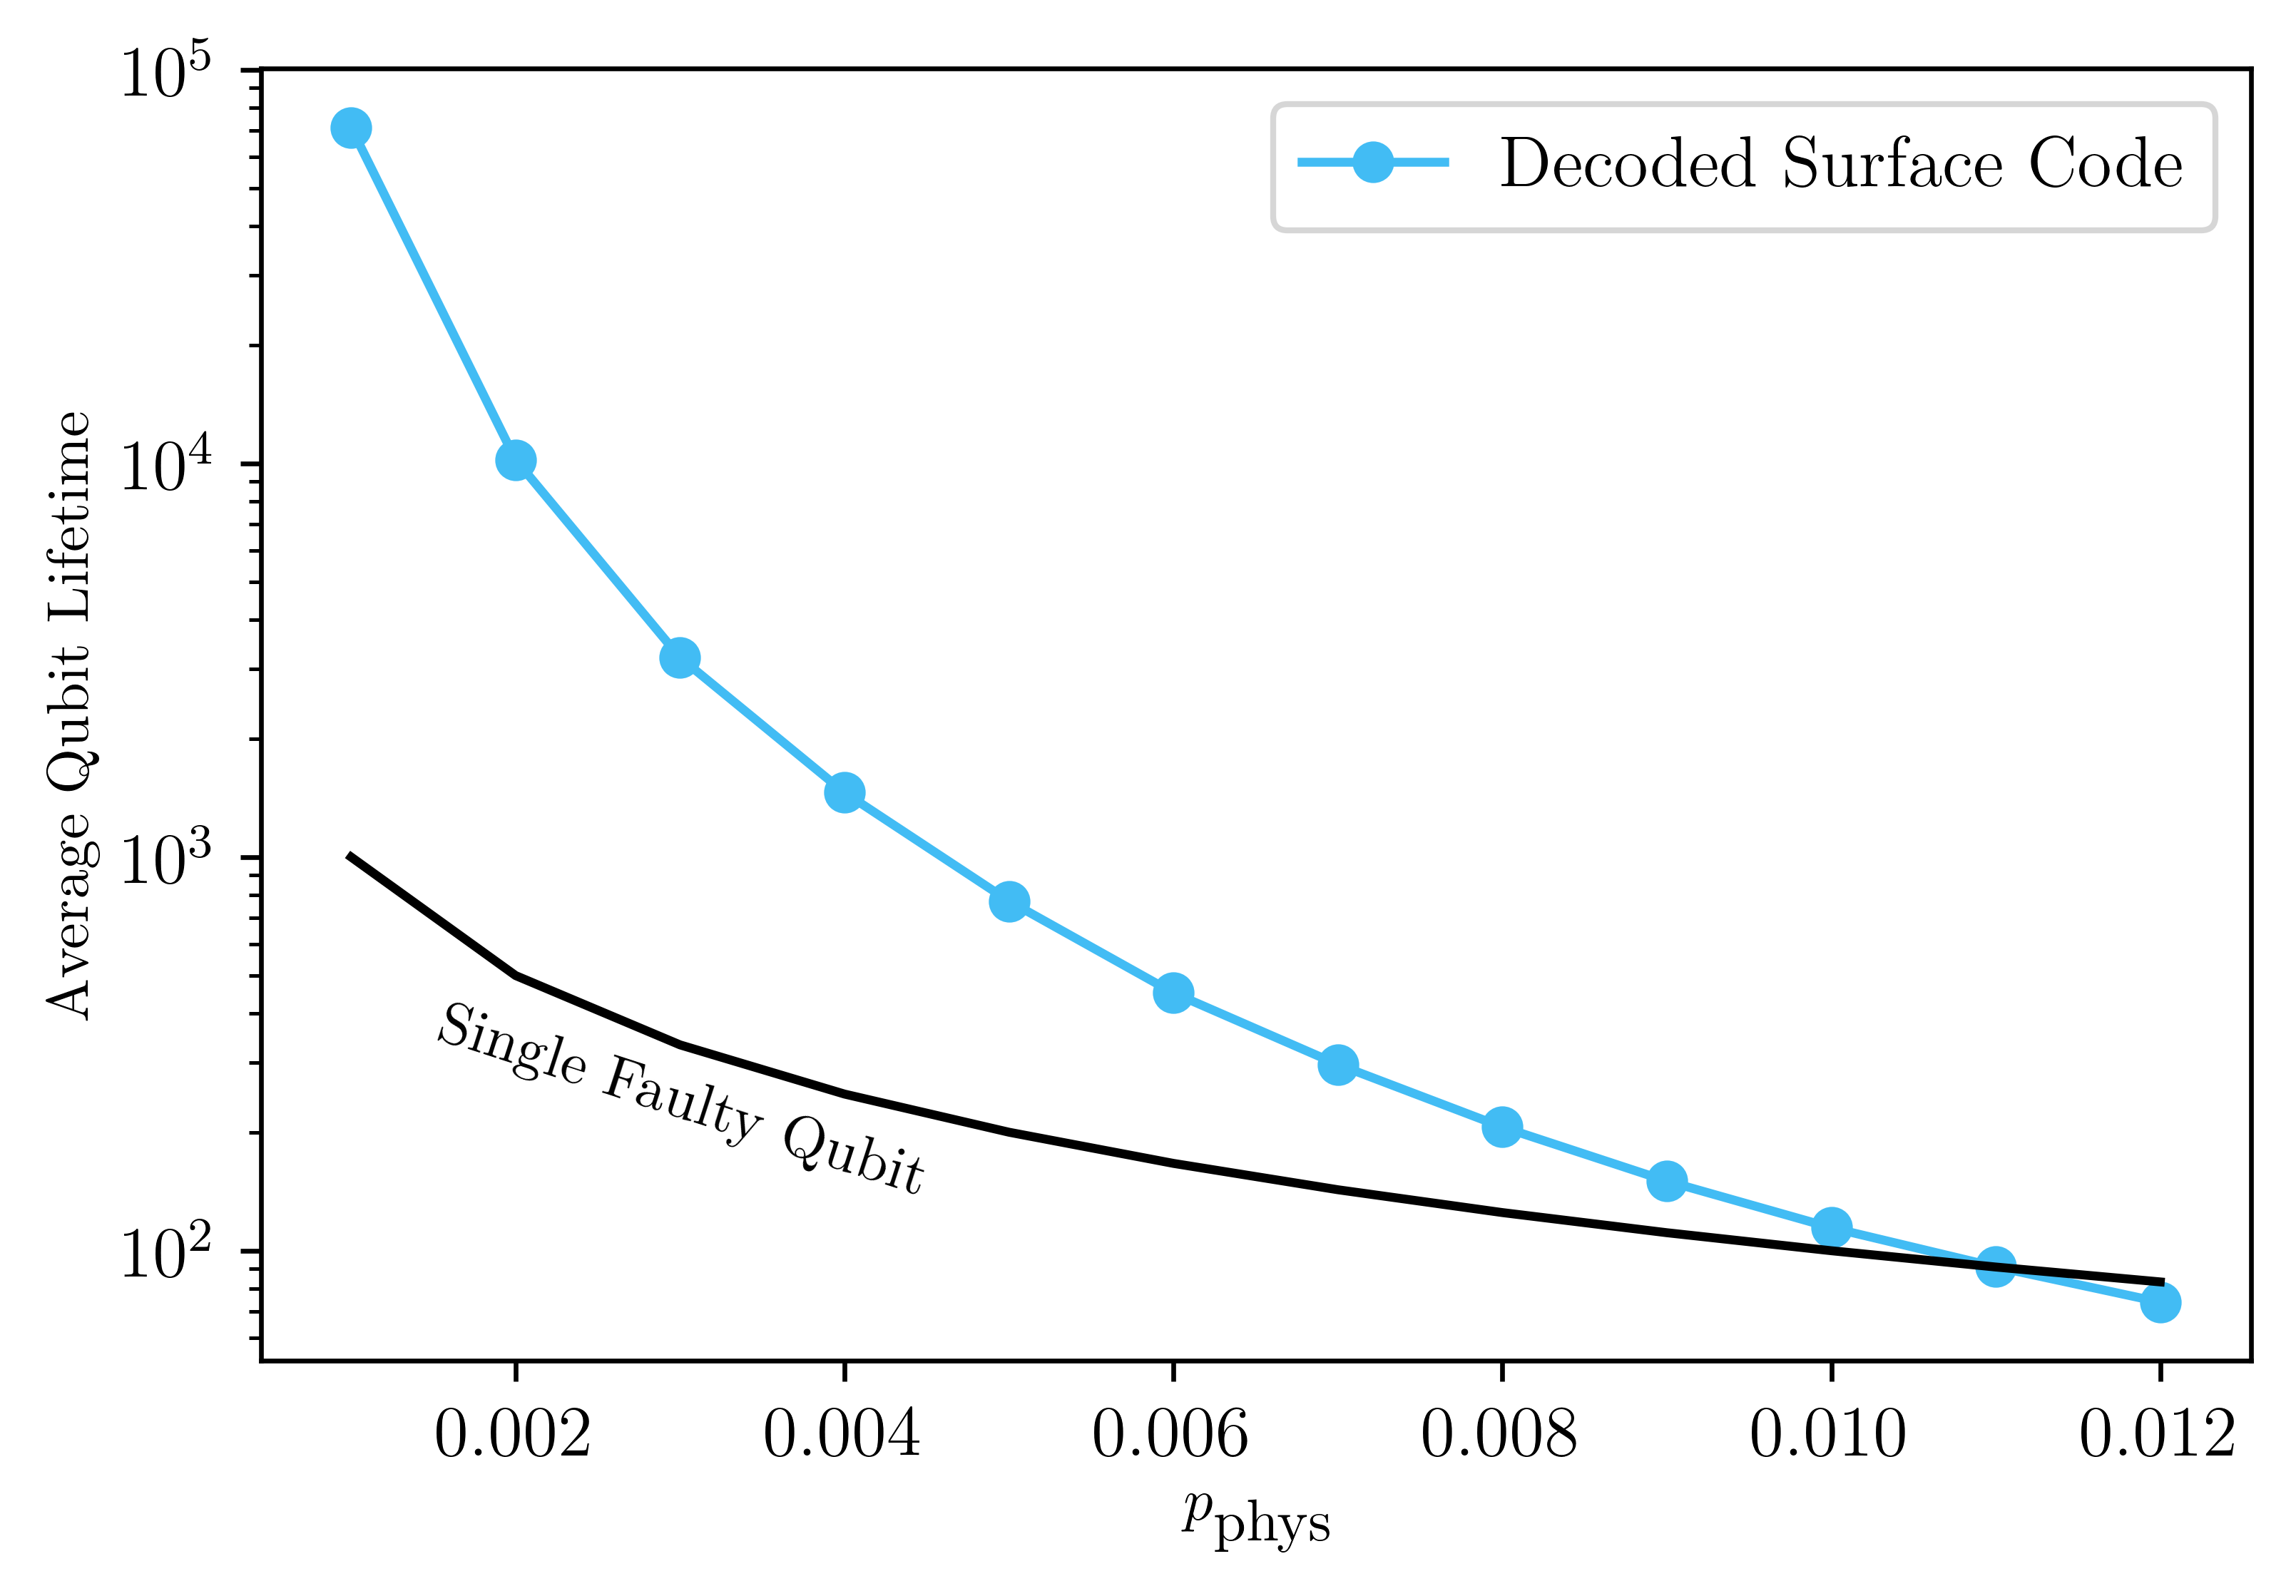

In [7]:
# I want to write something that fetches the combined best results...
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_dp_results.keys():
            if len(ordered_dp_results[agent]) >= j+1:
                if ordered_dp_results[agent][j] > benchmark:
                    benchmark = ordered_dp_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

fig, ax = plt.subplots(dpi=600)
ax.plot(p_phys[:len(best_results)], best_results, '-o', label="Decoded Surface Code")

ax.plot(p_phys[:len(best_results)],bench[:len(best_results)],"k")
ax.text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax.set_yscale('log')
    
#plt.title("Bitflip Noise")
ax.set_ylabel("Average Qubit Lifetime")
ax.set_xlabel("$p_{\\textrm{phys}}$")
ax.legend(fancybox=True)
fig.savefig("./Images_Alt/depolarising_noise.pdf", bbox_inches='tight')

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


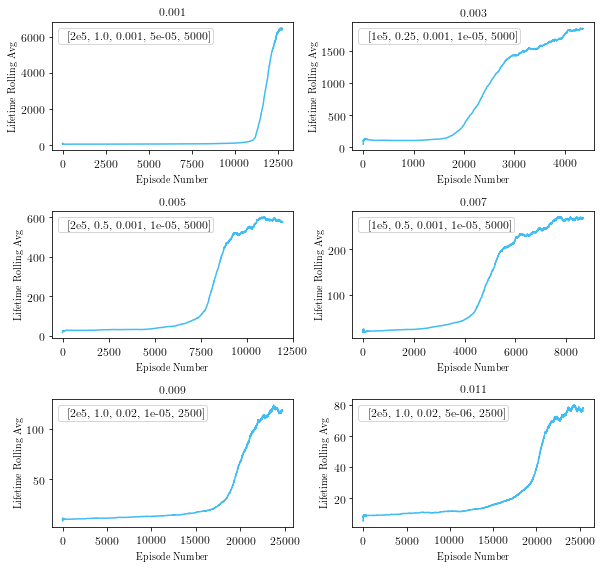

In [8]:
plt.figure(figsize=(8.5,8))
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011"]
count = 1
for key in trained_keys:
    plt.subplot(3, 2,count)
    plt.plot(dp_training_dict[key],label = dp_configs_dict[key] )
    plt.title(key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    #plt.legend(handlelength=0,loc="upper left",framealpha=1)
    plt.legend(handlelength=0,loc="upper left",borderpad=0.1)
    count +=1
    

plt.tight_layout()
plt.savefig("./Images/depolarising_training")
    

## Combined results

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


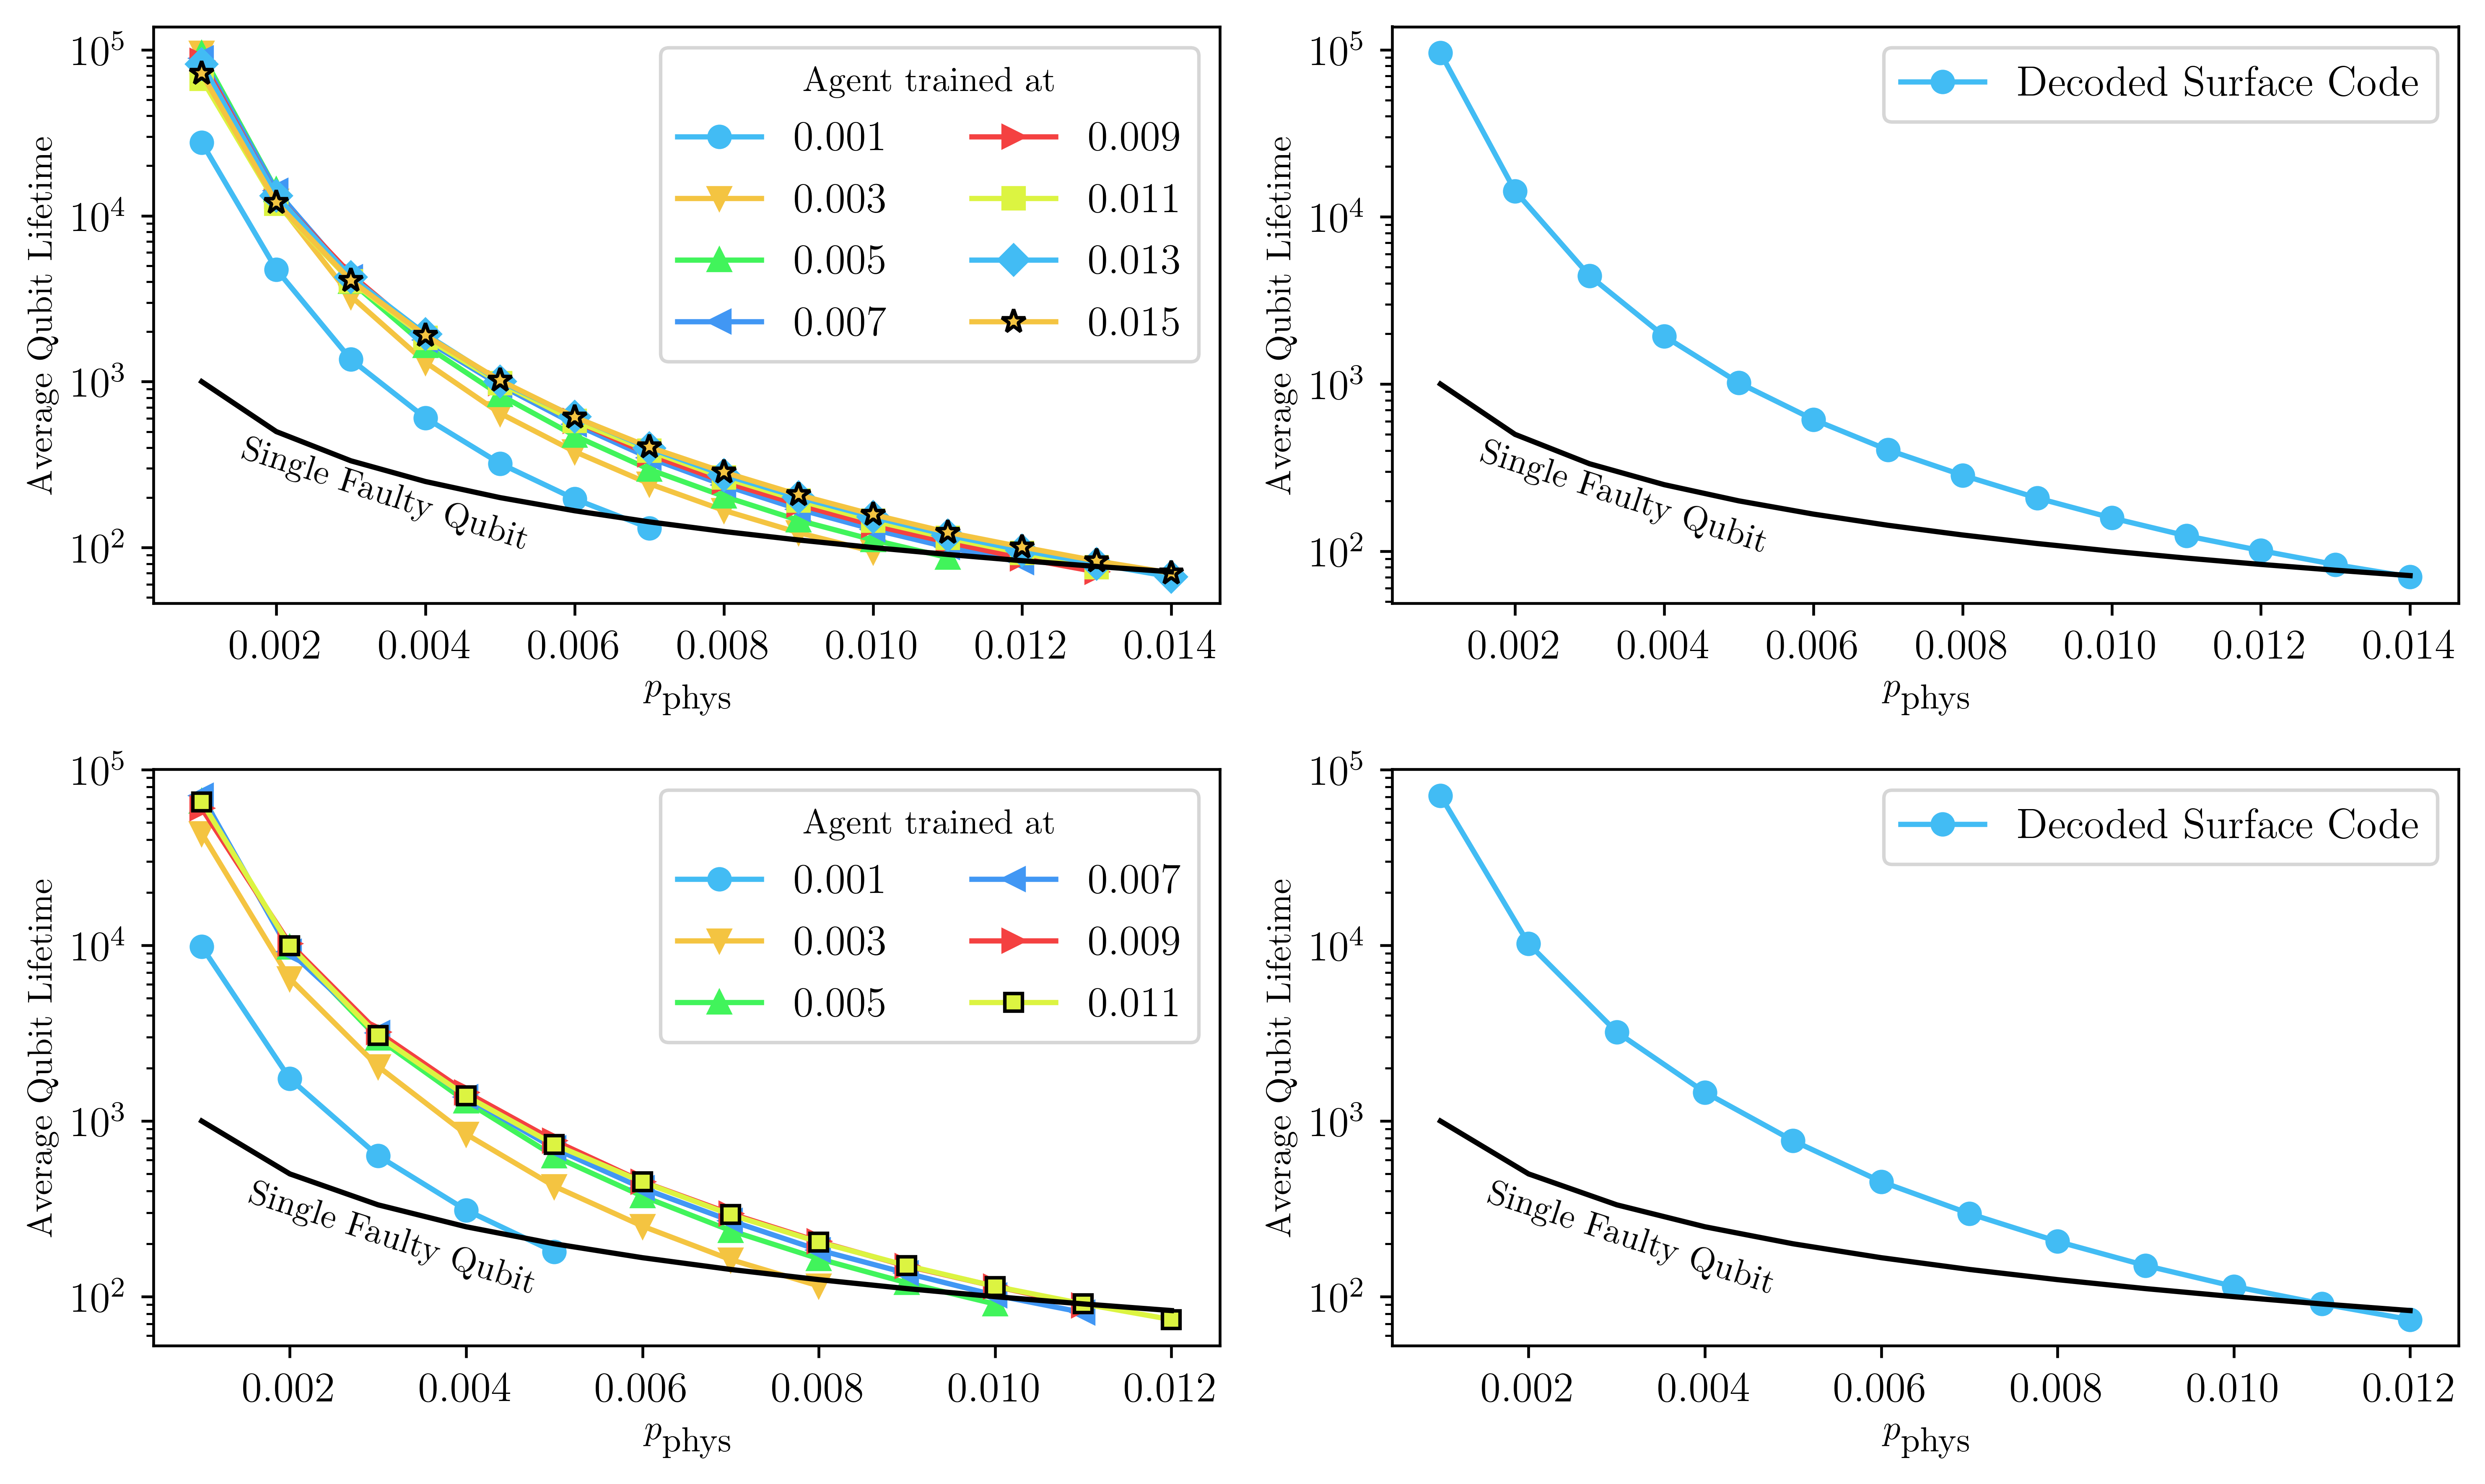

In [9]:
fig, ax = plt.subplots(2,2,dpi=600,figsize=(10,6))

p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

#---------------------------------------------------------------------------------
#
# Bitflip noise - All agents
#
#---------------------------------------------------------------------------------
count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_x_results.keys():
        if max_l < len(ordered_x_results[key]):
            max_l = len(ordered_x_results[key])
        if( key != "0.015" ):
            #ax.plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, markeredgecolor='k', markeredgewidth=0.5, label="$%s$"%key)
            ax[0,0].plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, label="$%s$"%key)
        else:
            ax[0,0].plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=7, markeredgecolor='k', label="$%s$"%key)
        count += 1
                        
ax[0,0].plot(p_phys[:max_l],bench[:max_l],"k")#,label="Single \n Faulty Qubit")
ax[0,0].text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax[0,0].set_yscale('log')

ax[0,0].set_ylabel("Average Qubit Lifetime")
ax[0,0].set_xlabel("$p_{\\textrm{phys}}$")# = p_{\\textrm{meas}}$")
ax[0,0].legend(fancybox=True, ncol=2, title="Agent trained at")


#---------------------------------------------------------------------------------
#
# Bitflip noise - Best agent
#
#---------------------------------------------------------------------------------
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_x_results.keys():
            if len(ordered_x_results[agent]) >= j+1:
                if ordered_x_results[agent][j] > benchmark:
                    benchmark = ordered_x_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

ax[0,1].plot(p_phys[:len(best_results)], best_results, '-o', label="Decoded Surface Code")

ax[0,1].plot(p_phys[:len(best_results)],bench[:len(best_results)],"k")
ax[0,1].text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel("Average Qubit Lifetime")
ax[0,1].set_xlabel("$p_{\\textrm{phys}}$")
ax[0,1].legend(fancybox=True)




#---------------------------------------------------------------------------------
#
# Depolarizing noise - All agents
#
#---------------------------------------------------------------------------------
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_dp_results.keys():
        if max_l < len(ordered_dp_results[key]):
            max_l = len(ordered_dp_results[key])
        if( key != "0.011" ):
            #ax.plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, markeredgecolor='k', markeredgewidth=0.5, label="$%s$"%key)
            ax[1,0].plot(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key], marker=markers[count], markersize=6, label="$%s$"%key)
        else:
            ax[1,0].plot(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key], marker=markers[count], markersize=5, markeredgecolor='k', label="$%s$"%key)
        count += 1
                        
ax[1,0].plot(p_phys[:max_l],bench[:max_l],"k")#,label="Single \n Faulty Qubit")
ax[1,0].text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)

ax[1,0].set_yscale('log')
ax[1,0].set_ylabel("Average Qubit Lifetime")
ax[1,0].set_xlabel("$p_{\\textrm{phys}}$")# = p_{\\textrm{meas}}$")
ax[1,0].legend(fancybox=True, ncol=2, title="Agent trained at")


#---------------------------------------------------------------------------------
#
# Depolarizing noise - Best agents
#
#---------------------------------------------------------------------------------
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_dp_results.keys():
            if len(ordered_dp_results[agent]) >= j+1:
                if ordered_dp_results[agent][j] > benchmark:
                    benchmark = ordered_dp_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

ax[1,1].plot(p_phys[:len(best_results)], best_results, '-o', label="Decoded Surface Code")

ax[1,1].plot(p_phys[:len(best_results)],bench[:len(best_results)],"k")
ax[1,1].text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax[1,1].set_yscale('log')
    
ax[1,1].set_ylabel("Average Qubit Lifetime")
ax[1,1].set_xlabel("$p_{\\textrm{phys}}$")
ax[1,1].legend(fancybox=True)

fig.tight_layout()
fig.savefig("./Images_Alt/final_results.pdf", bbox_inches='tight')

### Training history for DP Noise

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


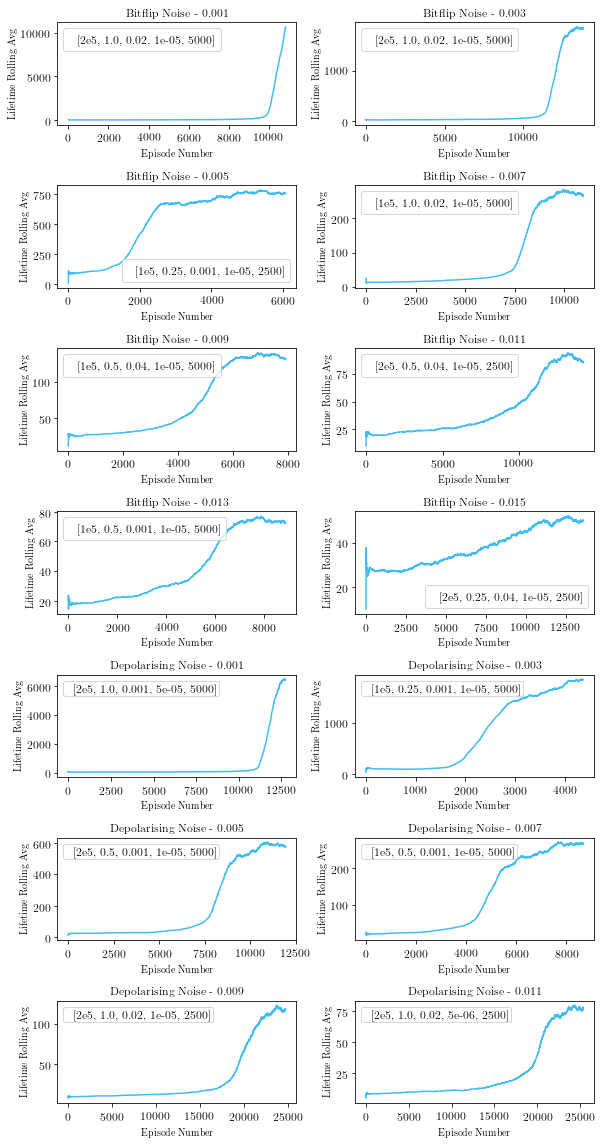

In [10]:
plt.figure(figsize=(8.5,16))
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011","0.013", "0.015"]
count = 1
for key in trained_keys:
    plt.subplot(7, 2,count)
    plt.plot(x_training_dict[key],label = x_configs_dict[key] )
    plt.title("Bitflip Noise - "+key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    plt.legend(handlelength=0,)
    count +=1
    
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011"]
for key in trained_keys:
    plt.subplot(7, 2,count)
    plt.plot(dp_training_dict[key],label = dp_configs_dict[key] )
    plt.title("Depolarising Noise - "+key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    #plt.legend(handlelength=0,loc="upper left",framealpha=1)
    plt.legend(handlelength=0,loc="upper left",borderpad=0.1)
    count +=1
    

plt.tight_layout()
plt.savefig("./Images/training_histories")

/home/rsweke/.local/share/virtualenvs/Documents-RLuhXVo4/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


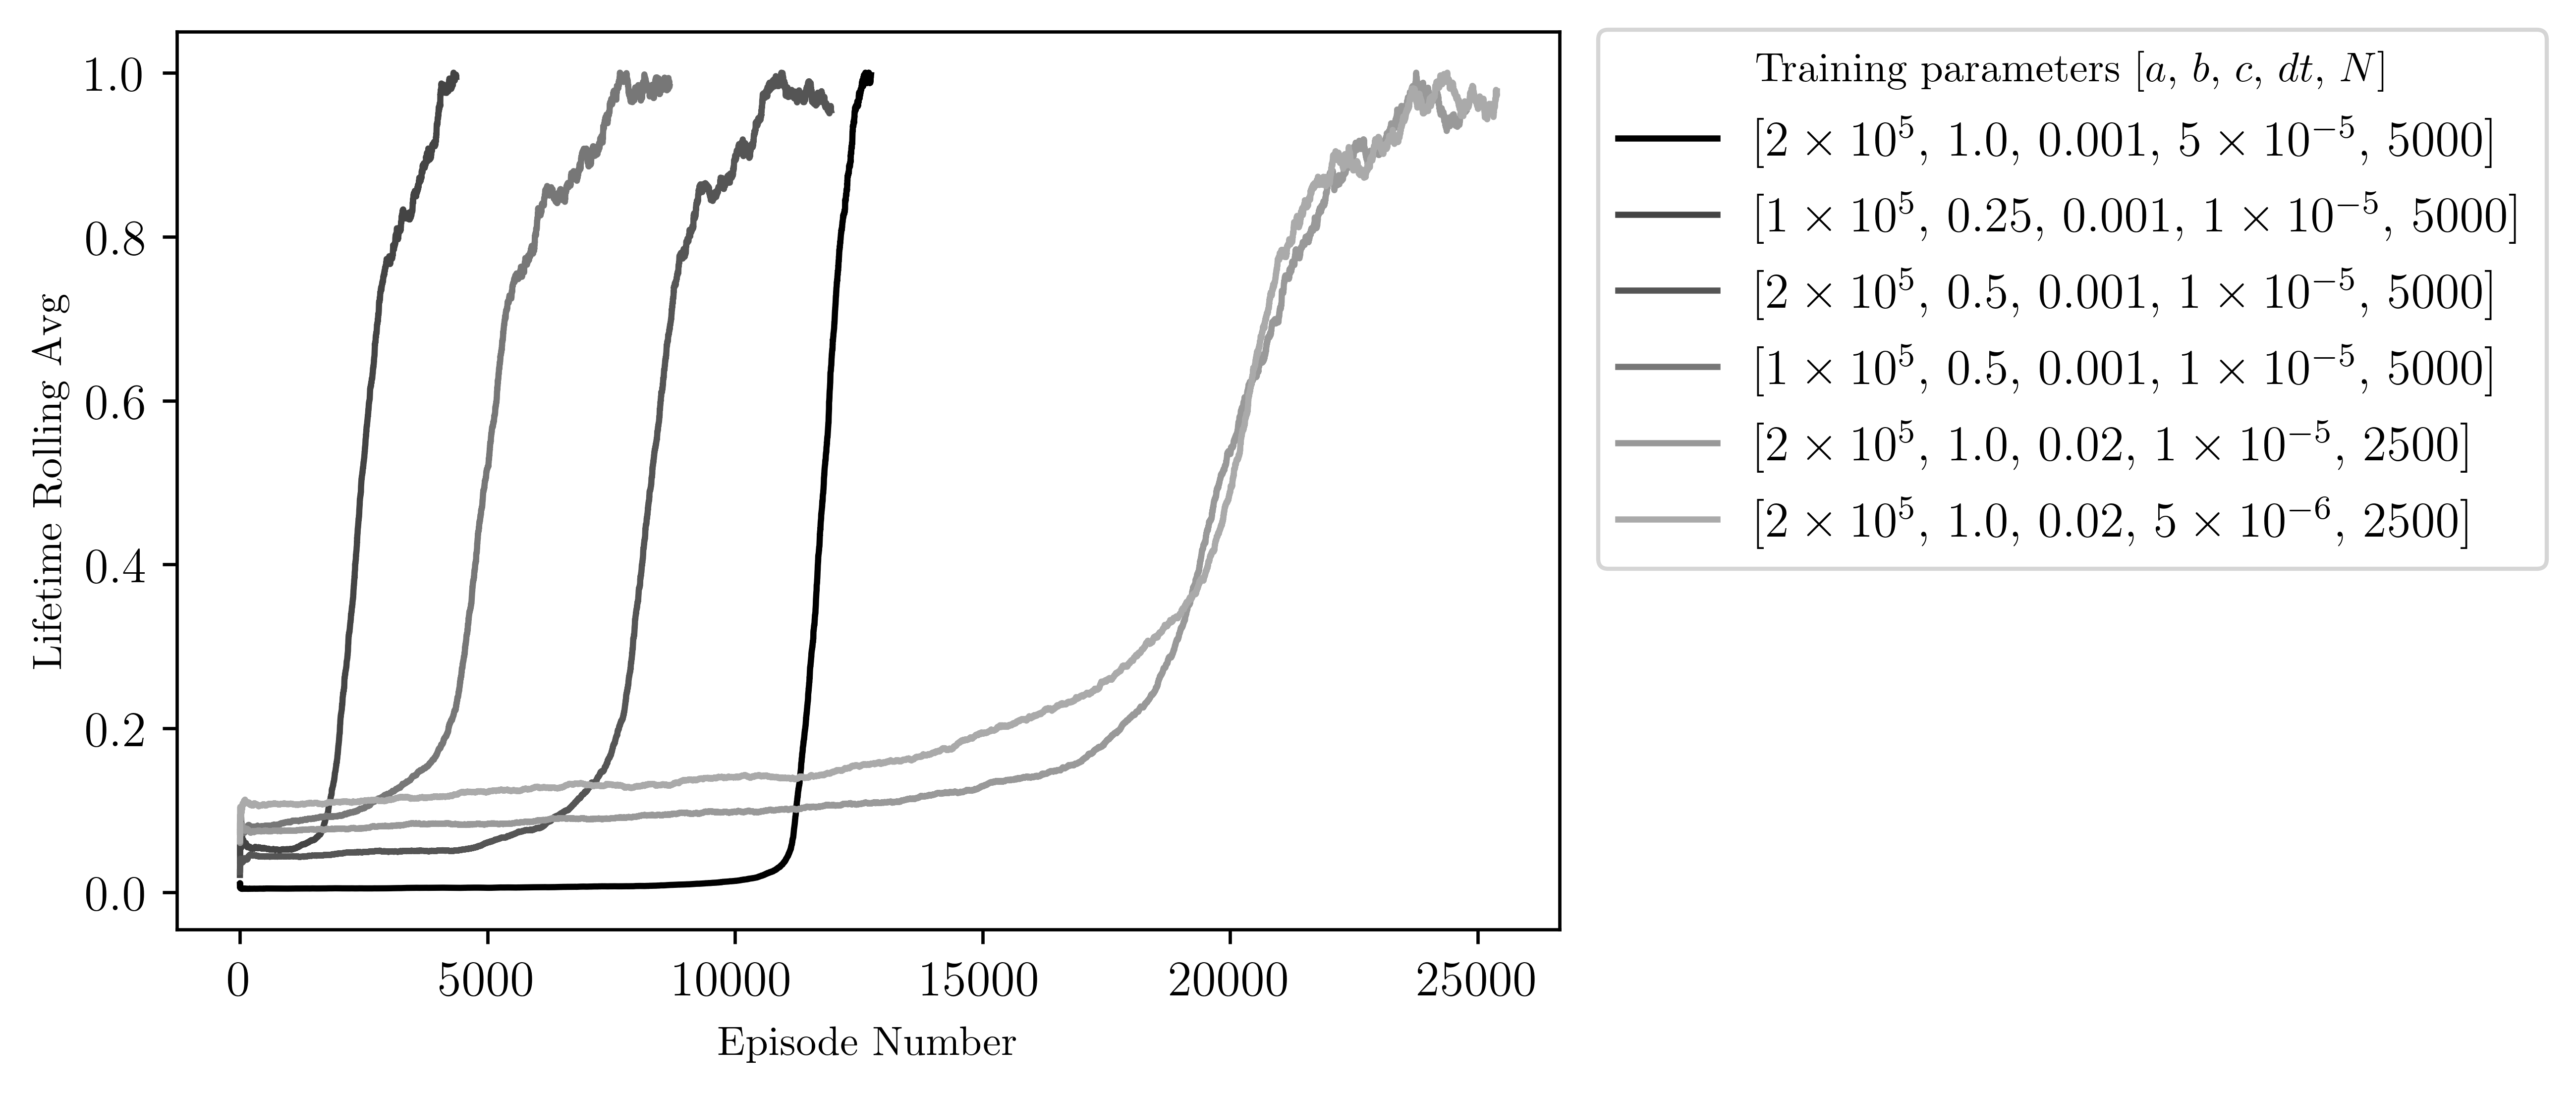

In [11]:
fig, ax = plt.subplots(dpi=600)

colors=["#000000", "#444444", "#555555", "#777777", "#999999", "#AAAAAA", "#BBBBBB", "#CCCCCC"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)
    
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011"]
for i,key in enumerate(trained_keys):
    m = max(dp_training_dict[key])
    l = dp_configs_dict[key][1:-1].split(",")
    l0 = "${0}\\times10^{1}$".format(l[0][0], l[0][2])
    l3 = "${0}\\times10^{{-{1}}}$".format(l[3][1], l[3][5])
    ax.plot(np.array(dp_training_dict[key])/m, color=colors[i], label="[%s, $%s$, $%s$, %s, $%s$]"%(l0,l[1],l[2],l3,l[4]) )
    
ax.set_xlabel("Episode Number")
ax.set_ylabel("Lifetime Rolling Avg")
ax.legend(fancybox=True, title="Training parameters [$a$, $b$, $c$, $dt$, $N$]", bbox_to_anchor=(1.01, 1.03))
fig.savefig("./Images_Alt/training_histories.pdf", bbox_inches='tight')
    